# Algebra of Fuzzy Sets

A. Cabri & F. Masulli DIBRIS - UNIGE


**Authors:** Giacomo Garbarino S4545532 - Manuel Parmiggiani S4701853

**Date:** started 26/04/2022 - ended 01/05/2022


Implement and test the following fuzzy set operations for discrete fuzzy sets:
1. Complement (function implementation and test given)
2. Intersection (function implementation given)
3. Union 
4. $\alpha-$level set
5. Algebraic sum
6. Bounded sum
7. Bounded difference
8. Bounded product
9. Algebraic product
10. Drastic product
11. Drastic sum
12. Cartesian product

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The rc settings are stored in a dictionary-like variable called matplotlib.rcParams,  global to the matplotlib package.

In [2]:
plt.rcParams["figure.figsize"] = (20,7) # set rc parameter figure.figsize

## Definition of 2 fuzzy sets
We will represent discrete fuzzy sets as a list of lists of two elements, containing the fuzzy set element and its membership to the fuzzy set.

In [3]:
#A =[[1,0.0],[2,0.0],[3,0.2],[4,0.8],[5,1],[6,0.2],[7,0.0],[8,0.0]]
#B =[[1,0.0],[2,0.1],[3,0.3],[4,1],[5,0.5],[6,0.1],[7,0.0],[8,0.0]]

B =[[1,0.2],[3,.7],[4,0.8],[5,.7],[6,0.5],[7,0.3],[8,0.1]]
A =[[1,0.1],[2,0.2],[4,.7],[5,1.],[8,0.3]]

In [4]:
# function set_and_mf_of_set  transform the initial representation of 
# a fuzzy set into  two ordered lists, one containing the elements of the fuzzy set (for x axis), 
# and the latter containing the correspondig membership (for y axis)
def set_and_mf_of_set(a):
    set1 =[]
    mfset=[]
    for i in range(len(a)):
        set1.append(a[i][0])
        mfset.append(a[i][1])
    return set1,mfset

In [5]:
print(set_and_mf_of_set(A))

([1, 2, 4, 5, 8], [0.1, 0.2, 0.7, 1.0, 0.3])


In [6]:
p,mfp = set_and_mf_of_set(A)
q,mfq = set_and_mf_of_set(B)
print(p,mfp)
print(q,mfq)

[1, 2, 4, 5, 8] [0.1, 0.2, 0.7, 1.0, 0.3]
[1, 3, 4, 5, 6, 7, 8] [0.2, 0.7, 0.8, 0.7, 0.5, 0.3, 0.1]


In [7]:
def sets(original_a, original_b):
    
    new_a = []  # the rebuilt version of A set list that will 
    # contain all the emements of set A with their corresponding
    # membership values and all the other elements found only 
    # in set B (their membership values in new_a will be 0)
    new_b = [] # the rebuilt version of B set list that will 
    # contain all the emements of set B with their corresponding
    # membership values and all the other elements found only 
    # in set A (their membership values in new_b will be 0)
    elements = [] # list with elements found in both A and B sets,
    #or only in one of them
    
    # creating elements list
    for i in range(len(original_a)):
        elements.append(original_a[i][0])
        
    for i in range(len(original_b)):
        elements.append(original_b[i][0])
        
    # remove duplicate elements and order the list
    elements = np.unique(elements)
    
    # creating new_a, new_b lists
    for i in range(len(elements)):
        el = elements[i]
        filterA = [t[1] for t in original_a if t[0] == el]
        valA = filterA[0] if len(filterA) == 1 else 0
        filterB = [t[1] for t in original_b if t[0] == el]
        valB = filterB[0] if len(filterB) == 1 else 0
        new_a.append([el,valA])
        new_b.append([el,valB])
                
    return new_a, new_b

In [8]:
print(A)
result = [t[0] for t in A if t[1] == 1.0] 
output = result[0] if len(result) == 1 else 0
print(output)

[[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
5


In [9]:
x, y = sets(A,B)
print(A)
print(B)
print(x)
print(y)

[[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
[[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
[[1, 0.1], [2, 0.2], [3, 0], [4, 0.7], [5, 1.0], [6, 0], [7, 0], [8, 0.3]]
[[1, 0.2], [2, 0], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]


## 1. Complement 

The Complement of a fuzzy set A is:

$\mu_{C(A)}(x)= 1-\mu_A(x)$

In [10]:
def Complement(a):
    complement=[]
    for i in range (len(a)):
        g = (a[i][0],1-a[i][1])
        complement.append(g)
    return complement

## Complement test

	 	 A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
Complement of A= [(1, 0.9), (2, 0.8), (4, 0.30000000000000004), (5, 0.0), (8, 0.7)]
	 	 B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Complement of B= [(1, 0.8), (3, 0.30000000000000004), (4, 0.19999999999999996), (5, 0.30000000000000004), (6, 0.5), (7, 0.7), (8, 0.9)]


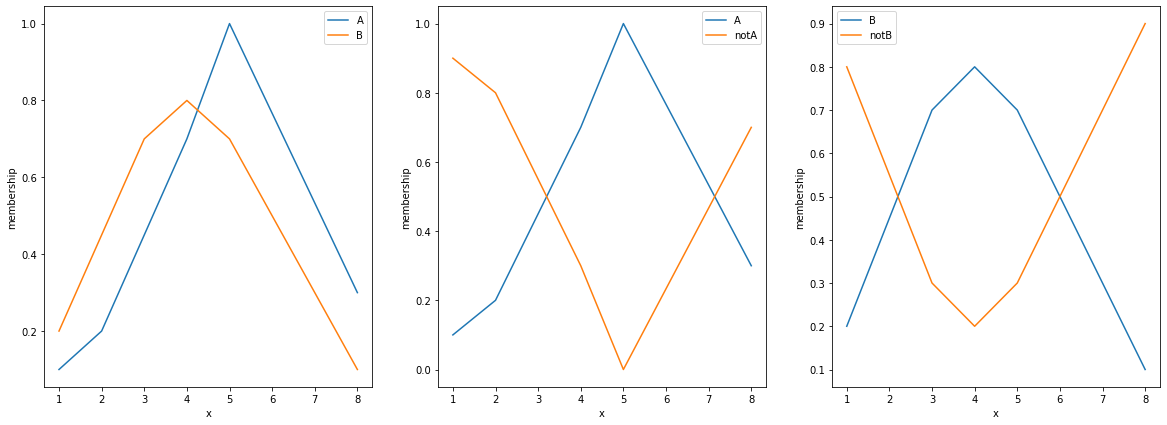

In [11]:
print('\t \t A= ',A)
C = Complement(A)
print('Complement of A=', C)

plt.subplot(131)
plt.xlabel('x')
plt.ylabel('membership')
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

r,mfr = set_and_mf_of_set(C)

plt.subplot(132)
l1,=plt.plot(p,mfp)
l2,=plt.plot(r,mfr)
plt.xlabel('x')
plt.ylabel('membership')
plt.legend([l1, l2],["A", "notA"])


print('\t \t B= ',B)
D = Complement(B)
print('Complement of B=', D)

h,mfh = set_and_mf_of_set(D)

plt.subplot(133)
l1,=plt.plot(q,mfq)
l2,=plt.plot(h,mfh)
plt.xlabel('x')
plt.ylabel('membership')
plt.legend([l1, l2],["B", "notB"])


## 2. Intersection

The Intersection operation over two fuzzy sets A and B is:

$\mu_{A\cap B}(x)=min(\mu_A(x),\mu_B(x))$


In [12]:
def Intersection(a,b):
    
    new_a, new_b = sets(a, b)
    
    # computing the operation for new_a and new_b sets
    intersection = [] 
    
    for i in range(len(new_a)):
        if(new_a[i][1] < new_b[i][1]):
            intersection.append(new_a[i])
        else:
            intersection.append(new_b[i])
        
    return intersection

### Intersection Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Intersection of A and B =  [[1, 0.1], [2, 0], [3, 0], [4, 0.7], [5, 0.7], [6, 0], [7, 0], [8, 0.1]]


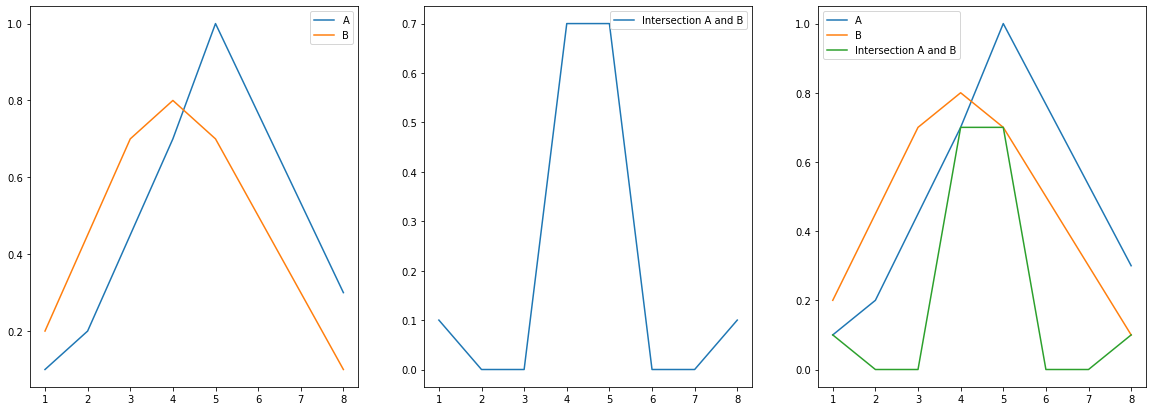

In [13]:
I=Intersection(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Intersection of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Intersection A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Intersection A and B"])


## 3. Union 
The Union operation over two fuzzy sets A and B is:

$\mu_{A\cup B}(x)=max(\mu_A(x),\mu_B(x))$



In [14]:
def Union(a,b):
    
    new_a, new_b = sets(a, b)
    
    # computing the operation for new_a and new_b sets
    union = [] 
    
    for i in range(len(new_a)):
        if(new_a[i][1] > new_b[i][1]):
            union.append(new_a[i])
        else:
            union.append(new_b[i])
        
    return union

### Union Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Union of A and B =  [[1, 0.2], [2, 0.2], [3, 0.7], [4, 0.8], [5, 1.0], [6, 0.5], [7, 0.3], [8, 0.3]]


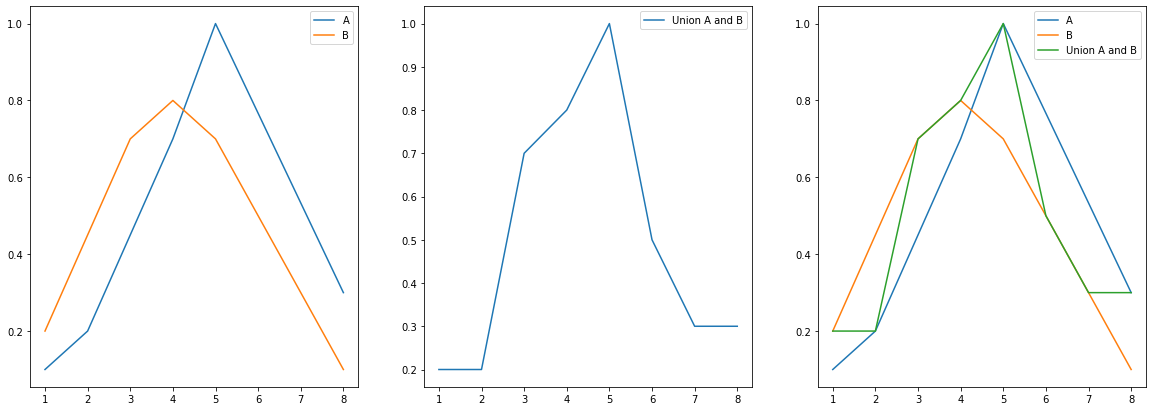

In [15]:
I=Union(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Union of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Union A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Union A and B"])


## 4. $\alpha-$level set 
The $\alpha-$level set  of a  fuzzy set A defined as:

$A_{\alpha}=\{x|\mu_A(x)\ge\alpha\}$

In [16]:
def AlfaLevelSet(a,membership_value):
    
    alfalevelset=[]
    
    for i in range (len(a)):
        if a[i][1]>=membership_value:
            alfalevelset.append(a[i])

    return alfalevelset

### $\alpha-$level set Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
Alfa =  0.3
Alfa-level set of A =  [[4, 0.7], [5, 1.0], [8, 0.3]]


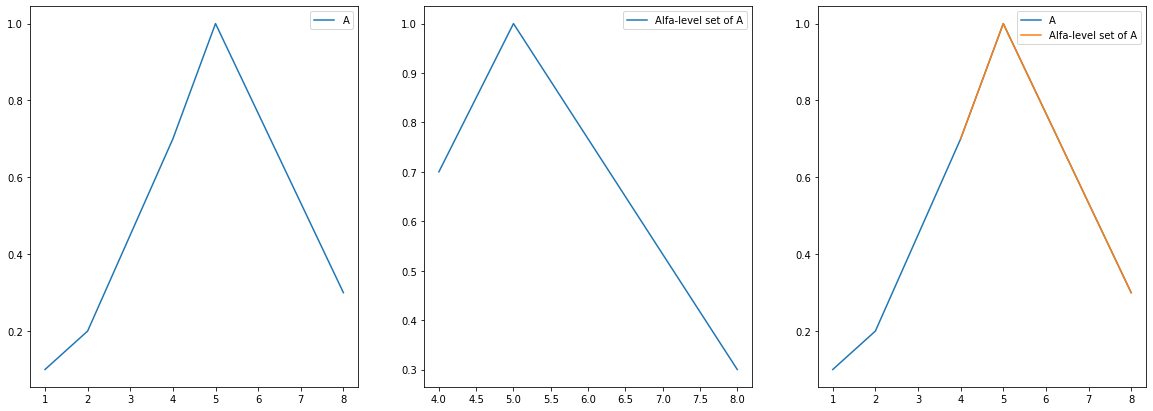

In [17]:
alfa = 0.3

I=AlfaLevelSet(A,alfa) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('Alfa = ',alfa)
print("Alfa-level set of A = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
plt.legend([l1],["A"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Alfa-level set of A"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2],["A", "Alfa-level set of A"])


## 5. Algebraic Sum

The Algebraic Sum operation over two fuzzy sets A and B is:

$\mu_{A+ B}(x)=\mu_A(x)+\mu_B(x)- \mu_A(x)\cdot\mu_B(x)$


In [18]:
def AlgebraicSum(a,b):
    
    new_a, new_b = sets(a, b)
    
    algebraicSum=[]
    
    for i in range (len(new_a)):
        algebraicSum.append([new_a[i][0],(new_a[i][1]+new_b[i][1])-(new_a[i][1]*new_b[i][1])]) 

    return algebraicSum

### Algebraic Sum Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Algebraic sum of A and B =  [[1, 0.28], [2, 0.2], [3, 0.7], [4, 0.9400000000000001], [5, 1.0], [6, 0.5], [7, 0.3], [8, 0.37]]


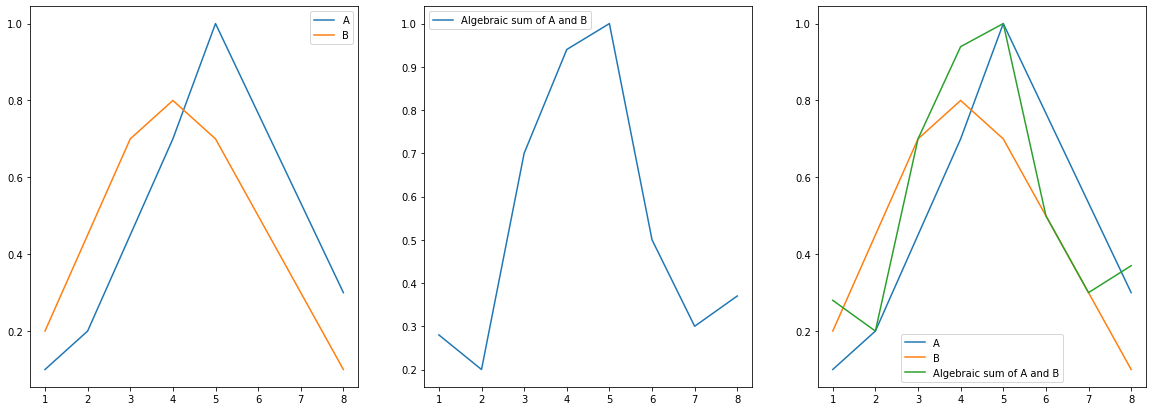

In [19]:
I=AlgebraicSum(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Algebraic sum of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Algebraic sum of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Algebraic sum of A and B"])


## 6. Bounded Sum

The Bounded Sum operation over two fuzzy sets A and B is:

$\mu_{A\oplus B}(x)=min\{1, \mu_A(x)+\mu_B(x)\}$


In [20]:
def BoundedSum(a,b):
    
    new_a, new_b = sets(a, b)
    
    boundedSum=[]
    
    for i in range (len(new_a)):
        if (new_a[i][1]+new_b[i][1]) < 1 :
            boundedSum.append([new_a[i][0],(new_a[i][1]+new_b[i][1])])
        else :
            boundedSum.append([new_a[i][0],1])

    return boundedSum

### Bounded Sum Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Bounded sum of A and B =  [[1, 0.30000000000000004], [2, 0.2], [3, 0.7], [4, 1], [5, 1], [6, 0.5], [7, 0.3], [8, 0.4]]


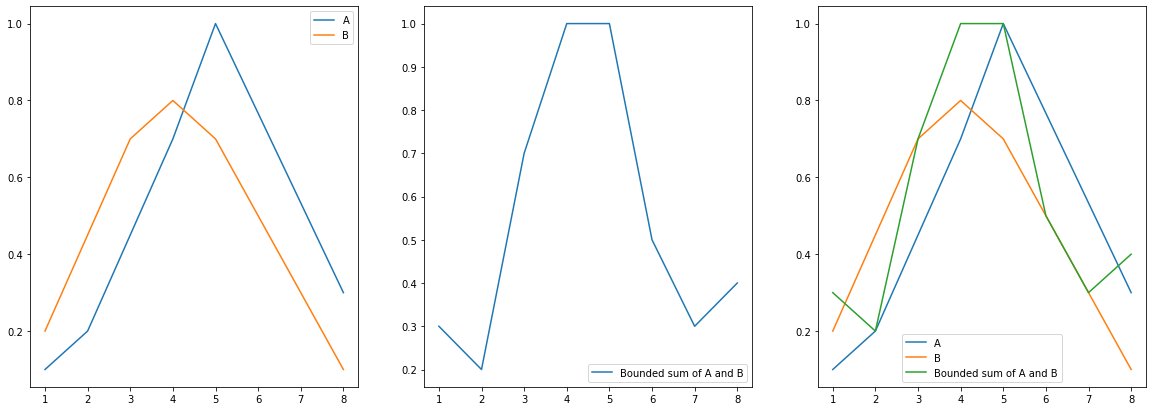

In [21]:
I=BoundedSum(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Bounded sum of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Bounded sum of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Bounded sum of A and B"])


## 7. Bounded Difference

The Bounded Difference operation over two fuzzy sets A and B is:


$\mu_{A\ominus B}(x)=max\{0, \mu_A(x)-\mu_B(x)\}$

In [22]:
def BoundedDifference(a,b):
    
    new_a, new_b = sets(a, b)
    
    boundedDifference=[]
    
    for i in range (len(new_a)):
        if (new_a[i][1] - new_b[i][1]) > 0 :
            boundedDifference.append([new_a[i][0],(new_a[i][1] - new_b[i][1])])
        else :
            boundedDifference.append([new_a[i][0],0])

    return boundedDifference

### Bounded Difference Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Bounded difference of A and B =  [[1, 0], [2, 0.2], [3, 0], [4, 0], [5, 0.30000000000000004], [6, 0], [7, 0], [8, 0.19999999999999998]]


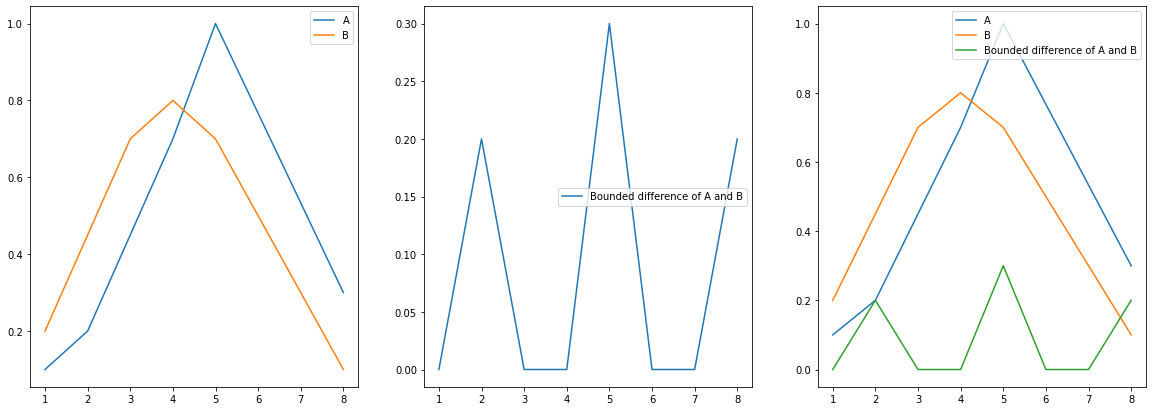

In [23]:
I=BoundedDifference(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Bounded difference of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Bounded difference of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Bounded difference of A and B"])


## 8. Bounded Product

The Bounded Product operation over two fuzzy sets A and B is:


$\mu_{A\odot B}(x)=max\{0, \mu_A(x)+\mu_B(x)-1\}$

In [24]:
def BoundedProduct(a,b):
    
    new_a, new_b = sets(a, b)
    
    boundedProduct=[]
    
    for i in range (len(new_a)):
        if (new_a[i][1] + new_b[i][1] - 1) > 0 :
            boundedProduct.append([new_a[i][0],(new_a[i][1] + new_b[i][1] - 1)])
        else :
            boundedProduct.append([new_a[i][0],0])

    return boundedProduct

### Bounded Product Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Bounded product of A and B =  [[1, 0], [2, 0], [3, 0], [4, 0.5], [5, 0.7], [6, 0], [7, 0], [8, 0]]


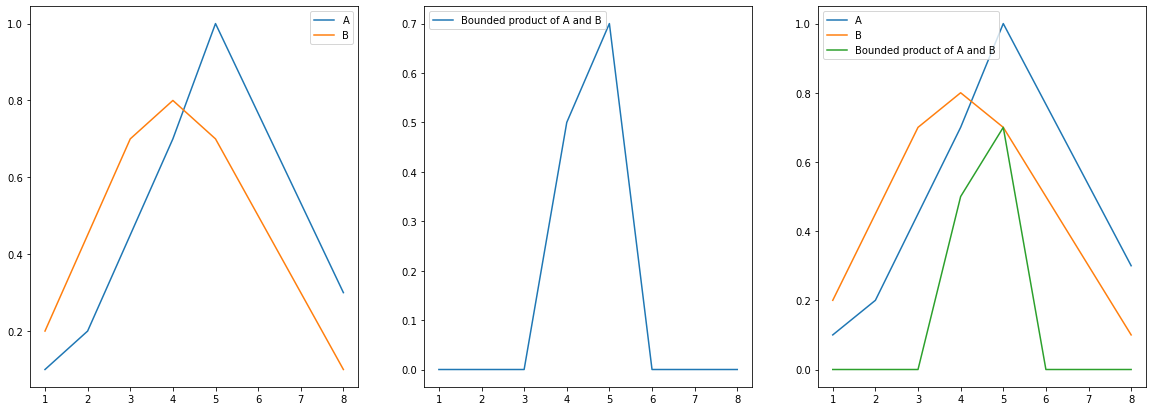

In [25]:
I=BoundedProduct(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Bounded product of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Bounded product of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Bounded product of A and B"])


## 9. Algebraic Product

The Algebraic Product operation over two fuzzy sets A and B is:

$\mu_{A\cdot B}(x)= \mu_A(x)\cdot\mu_B(x)$

In [26]:
def AlgebraicProduct(a,b):
    
    new_a, new_b = sets(a, b)
    
    algebraicProduct=[]
    
    for i in range (len(new_a)):
        algebraicProduct.append([new_a[i][0],(new_a[i][1] * new_b[i][1])])

    return algebraicProduct

### Algebraic Product Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Algebraic product of A and B =  [[1, 0.020000000000000004], [2, 0.0], [3, 0.0], [4, 0.5599999999999999], [5, 0.7], [6, 0.0], [7, 0.0], [8, 0.03]]


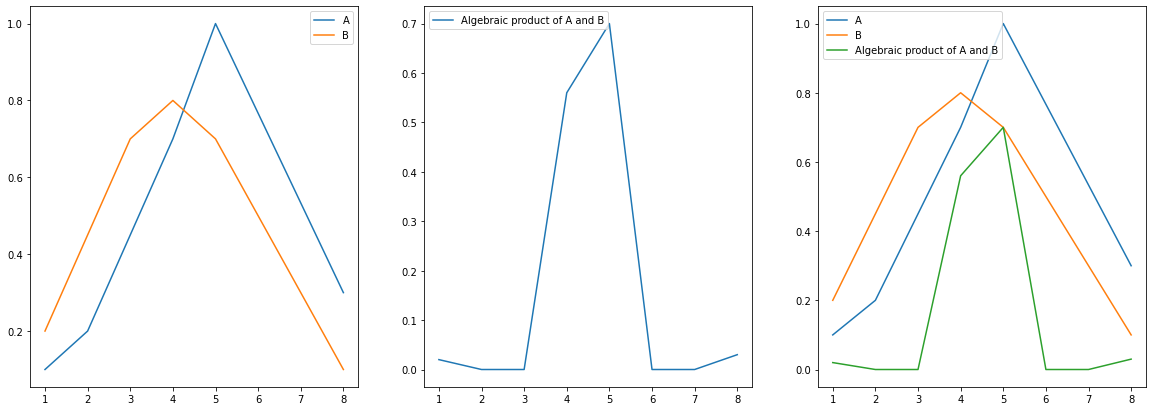

In [27]:
I=AlgebraicProduct(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Algebraic product of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Algebraic product of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Algebraic product of A and B"])


## 10. Drastic Product

The Drastic Product operation over two fuzzy sets A and B is:

$\begin{equation}
\mu_{A \boldsymbol{\dot{\cap}} B}(x) =
    \begin{cases}
      \mu_B(x)  & \mbox{if}\;\mu_A(x)=1\\
      \mu_A(x)  & \mbox{if}\;\mu_B(x)=1\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}
$

In [28]:
def DrasticProduct(a,b):
    
    new_a, new_b = sets(a, b)
    
    drasticProduct=[]
    
    for i in range (len(new_a)):
        if (new_a[i][1] == 1) :
            drasticProduct.append([new_a[i][0],new_b[i][1]])
        elif (new_b[i][1] == 1) :
            drasticProduct.append([new_a[i][0],new_a[i][1]])
        else :
            drasticProduct.append([new_a[i][0],0])

    return drasticProduct

### Drastic Product Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Drastic product of A and B =  [[1, 0], [2, 0], [3, 0], [4, 0], [5, 0.7], [6, 0], [7, 0], [8, 0]]


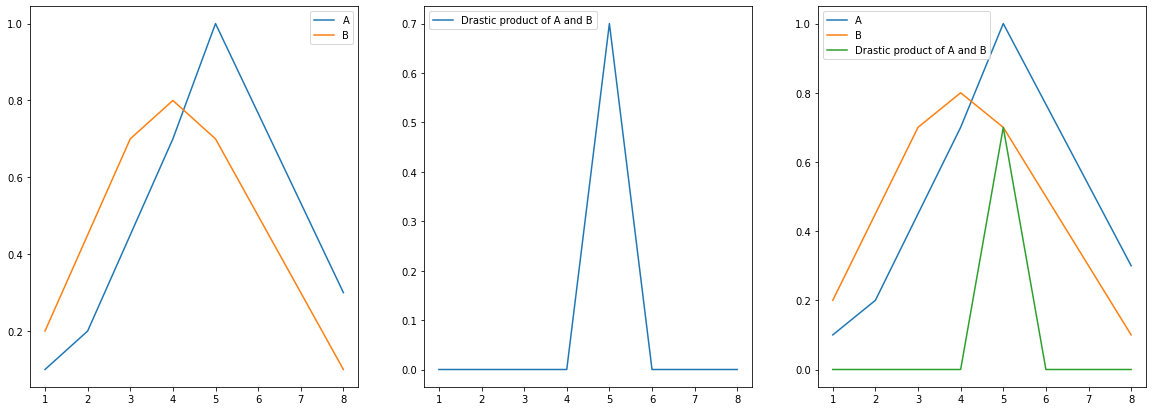

In [29]:
I=DrasticProduct(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Drastic product of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Drastic product of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Drastic product of A and B"])


## 11. Drastic Sum

The Drastic Sum operation over two fuzzy sets A and B is:

$\begin{equation}
\mu_{A \boldsymbol{\dot{\cup}} B}(x) =
    \begin{cases}
      \mu_B(x)  & \mbox{if}\;\mu_A(x)=0\\
      \mu_A(x)  & \mbox{if}\;\mu_B(x)=0\\
      1 & \text{otherwise}
    \end{cases}       
\end{equation}
$

In [30]:
def DrasticSum(a,b):
    
    new_a, new_b = sets(a, b)
    
    drasticSum=[]
    
    for i in range (len(new_a)):
        if (new_a[i][1] == 0) :
            drasticSum.append([new_a[i][0],new_b[i][1]])
        elif (new_b[i][1] == 0) :
            drasticSum.append([new_a[i][0],new_a[i][1]])
        else :
            drasticSum.append([new_a[i][0],1])

    return drasticSum

### Drastic Sum Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Drastic sum of A and B =  [[1, 1], [2, 0.2], [3, 0.7], [4, 1], [5, 1], [6, 0.5], [7, 0.3], [8, 1]]


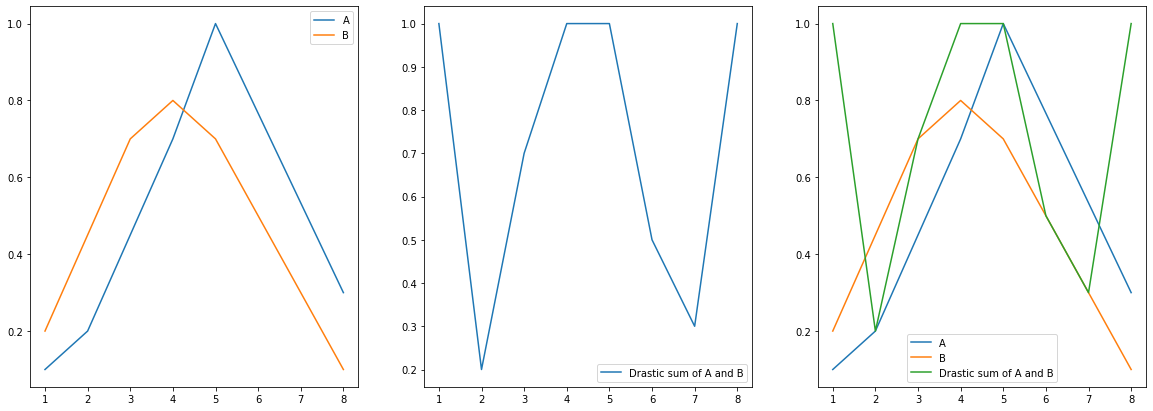

In [31]:
I=DrasticSum(A,B) 
r,mfr = set_and_mf_of_set(I)

print('A= ',A)
print('B= ',B)
print("Drastic sum of A and B = ",I)

plt.subplot(131)
l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
plt.legend([l1, l2],["A", "B"])

plt.subplot(132)
l1,=plt.plot(r,mfr)
plt.legend([l1],["Drastic sum of A and B"])

plt.subplot(133)

l1,=plt.plot(p,mfp)
l2,=plt.plot(q,mfq)
l3,=plt.plot(r,mfr)
plt.legend([l1, l2, l3],["A", "B","Drastic sum of A and B"])


## 12. Cartesian Product

The Cartesian Product of two fuzzy sets A and B defined in two universes of discourse X and Y is defined as:

$\mu_{A\times B}(x,y)=min(\mu_A(x),\mu_B(y))$

In [32]:
def CartesianProduct(a,b):
    
    cartesianProduct = []
    
    for i in range (len(a)):
        for j in range (len(b)):
            if(a[i][1] < b[j][1]):
                cartesianProduct.append([[a[i][0],b[j][0]],a[i][1]])
            else :
                cartesianProduct.append([[a[i][0],b[j][0]],b[i][1]])
        
    return cartesianProduct

### Cartesian Product Test

A=  [[1, 0.1], [2, 0.2], [4, 0.7], [5, 1.0], [8, 0.3]]
B=  [[1, 0.2], [3, 0.7], [4, 0.8], [5, 0.7], [6, 0.5], [7, 0.3], [8, 0.1]]
Cartesian product of A and B =  [[[1, 1], 0.1], [[1, 3], 0.1], [[1, 4], 0.1], [[1, 5], 0.1], [[1, 6], 0.1], [[1, 7], 0.1], [[1, 8], 0.2], [[2, 1], 0.7], [[2, 3], 0.2], [[2, 4], 0.2], [[2, 5], 0.2], [[2, 6], 0.2], [[2, 7], 0.2], [[2, 8], 0.7], [[4, 1], 0.8], [[4, 3], 0.8], [[4, 4], 0.7], [[4, 5], 0.8], [[4, 6], 0.8], [[4, 7], 0.8], [[4, 8], 0.8], [[5, 1], 0.7], [[5, 3], 0.7], [[5, 4], 0.7], [[5, 5], 0.7], [[5, 6], 0.7], [[5, 7], 0.7], [[5, 8], 0.7], [[8, 1], 0.5], [[8, 3], 0.3], [[8, 4], 0.3], [[8, 5], 0.3], [[8, 6], 0.3], [[8, 7], 0.5], [[8, 8], 0.5]]


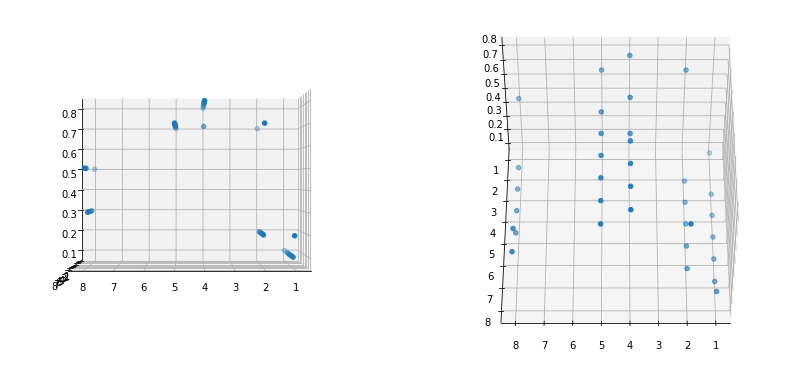

In [33]:
from mpl_toolkits import mplot3d #necessary for plotting
fig = plt.figure(figsize=plt.figaspect(0.5))

I=CartesianProduct(A,B) 
r,mfr = set_and_mf_of_set(I) #r is a list of couples
r1,r2 = set_and_mf_of_set(r) #quite improper using of the function, but we needed to split each couple of cooridnates

print('A= ',A)
print('B= ',B)
print("Cartesian product of A and B = ",I)

#same plot from different point of views, in order to observe better the data distribution
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(0,90)
ax.scatter3D(r1,r2,mfr)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(50,90)
ax.scatter3D(r1,r2,mfr)
